# Statystyka matematyczna - ćwiczenia laboratoryjne

Ten notatnik ma charakter wyłącznie ćwiczeniowy, nie podlega ocenie i nie zalicza się do zestawów zadań, na podstawie których odbywa się zaliczenie przedmiotu.

Uwagi i wytyczne ogólne dotyczące uzupełniania notatnika:
- Podczas wykonywania zadań należy korzystać wyłącznie z pakietów zaimportowanych na początku notatnika oraz z pakietów wchodzących w skład standardowej biblioteki Pythona, które można zaimportować samodzielnie we wskazanej komórce notatnika.
- Swoje rozwiązania należy wprowadzać wyłącznie w miejce następujących fragmentów kodu:<br/> `# YOUR CODE HERE`<br/> `raise NotImplementedError()`<br/> 
a odpowiedzi tekstowe w komórkach oznaczonych hasłem:<br/> 
`YOUR ANSWER HERE`<br/> 
Nie należy w żaden sposób modyfikować pozostałych fragmentów kodu oraz innych elementów notatnika, w szczególności dodawać lub usuwać komórek oraz zmieniać nazwy pliku.
- Otrzymywane wyniki i odpowiedzi mają być rezultatem wykonania napisanego kodu.
- Zadanie należy wykonać w taki sposób, aby podczas wykonywania kodu nie zostały wyświetlone żadne ostrzeżenia.
- Zawarte w notatniku automatyczne testy mają charakter poglądowy. Dotyczą one wybranych aspektów zadań i mają za zadanie wyłapać podstawowe błędy. Przejście wszystkich testów nie oznacza, że zadanie jest wykonane w całości poprawnie.

Uwagi i wytyczne ogólne dotyczące wizualizacji wyników:
- Wszystkie wykresy powinny być wykonane w jednolitym, przejrzystym i czytelnym stylu, posiadać odpowiednio dobrane proporcje i zakresy wartości osi.
- Wykresy oraz ich osie powinny mieć nadane tytuły. Jeżeli w obrębie figury znajduje się więcej niż jeden wykres to figura również powinna mieć nadany tytuł. 
- Figury powinny mieć ustawione białe tło, tak, aby niezależnie od ustawień notatnika wszystkie elementy wykresów były dobrze widoczne (domyślnie tło jest przeźroczyste co może powodować problemy w notatnikach z ustawionym ciemnym tłem).
- Rozmiar poziomy figur nie powinien przekraczać 20 cali.

---

# Zestaw ćwiczeniowy 2: pakiety Numpy, Pandas, Matplotlib i Seaborn

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Miejsce do importu pakietów wchodzących w skład standardowej biblioteki Pythona oraz ustawienie opcji wykorzystywanych pakietów

## Zadanie 1
a) Korzystając z funkcji `np.array()` zdefiniuj zmienną `ar1` zawierającą następującą macierz $\left[ \begin{array}{cccc} 5 & 3 & 6 & 4 \\ 1 & 7 & 4 & 1 \\ 9 & 2 & 8 & 5 \\ \end{array} \right]$.

In [3]:
ar1 = np.array([[5, 3, 6, 4], [1, 7, 4, 1], [9, 2, 8, 5]])

In [4]:
# Komórka testowa
assert ar1.shape == (3, 4)
assert ar1.min() == 1
assert ar1.max() == 9
assert np.isclose(ar1.mean(), 4.583333333333333)
assert ar1[0, 2] == 6
assert ar1[1, 0] == 1
assert ar1[2, 3] == 5

b) Korzystając z funkcji `np.zeros_like()` zdefiniuj macierz zerową `ar2` o wymiarach identycznych jak macierz `ar1`.

In [5]:
ar2 = np.zeros_like(ar1)

In [6]:
# Komórka testowa
assert ar2.shape == (3, 4)
assert ar2.min() == 0
assert ar2.max() == 0

c) Korzystając z instrukcji warunkowej dodaj 1 do komórek macierzy `ar2`, jeżeli wartość w odpowiadających im komórkach macierzy `ar1` jest większa od 5.

In [7]:
ar2[ar1 > 5] += 1

In [8]:
# Komórka testowa
assert np.all(np.isclose(ar2, np.array([[0, 0, 1, 0], [0, 1, 0, 0], [1, 0, 1, 0]])))

## Zadanie 2

a) Korzystając z funkcji `np.arange()` zdefiniuj zmienną `ar3` jako macierz zawierającą kolejne liczby od 0 do 100 z krokiem 20.

In [9]:
ar3 = np.arange(0, 101, 20)

In [10]:
# Komórka testowa
assert ar3.shape == (6,)
assert np.all(np.isclose(ar3, np.array([0, 20, 40, 60, 80, 100])))

b) Korzystając z funkcji `np.atleast_2d()` i transpozycji (`.T`) zdefiniuj macierz `ar4` jako transponowaną macierz `ar3`.

In [11]:
ar4 = np.atleast_2d(ar3).T

In [12]:
# Komórka testowa
assert ar4.shape == (6, 1)
assert np.all(np.isclose(ar4, np.array([[0], [20], [40], [60], [80], [100]])))

c) Zdefiniuj macierz `ar5` jako iloczyn macierzy `ar4` i `ar3`.

In [13]:
ar5 = ar4 * ar3

In [14]:
# Komórka testowa
assert ar5.shape == (6, 6)
assert np.isclose(ar5.min(), 0)
assert np.isclose(ar5.max(), 10000)
assert np.isclose(ar5.mean(), 2500.0)
assert np.all(np.isclose(ar5.sum(axis=0), ar5.sum(axis=1)))

d) Korzystając z funckji `np.reshape()` zdefiniuj  na podstawie macierzy `ar5` macierz `ar6` o wymiarach 12x3. Skorzystaj z domyślnej wartości argumentu `order`.

In [30]:
ar6 = np.reshape(ar5, (12,3), order='A')

In [31]:
# Komórka testowa
assert ar6.shape == (12, 3)
assert np.isclose(ar6.min(), 0)
assert np.isclose(ar6.max(), 10000)
assert np.all(np.isclose(ar6.sum(axis=0), [18000, 30000, 42000]))
assert np.all(np.isclose(ar6.sum(axis=1), [0, 0, 1200, 4800, 2400, 9600, 3600, 14400, 4800, 19200, 6000, 24000]))

## Zadanie 3

a) Zdefiniuj zmienną `ar7` jako macierz przygotowaną zgodnie z poniższymi wytycznymi:
1) Korzystając z funkcji `np.zeros()` zdefiniuj macierz zerową o wymiarach 7x5.
2) Dodaj 10 do wszystkich elementów macierzy.
3) Dodaj do kolejnych kolumn macierzy następujące wartości: 1, 2, 3, 2, 1.
4) Odejmij od kolejnych wierszy macierzy następujące wartości: 3, 2, 1, 0, 1, 2, 3.

In [36]:
ar7 = np.zeros((7,5))
ar7 += 10
ar7 += [1,2,3,2,1]
ar7 -= np.array([[3,2,1,0,1,2,3]]).T
ar7

array([[ 8.,  9., 10.,  9.,  8.],
       [ 9., 10., 11., 10.,  9.],
       [10., 11., 12., 11., 10.],
       [11., 12., 13., 12., 11.],
       [10., 11., 12., 11., 10.],
       [ 9., 10., 11., 10.,  9.],
       [ 8.,  9., 10.,  9.,  8.]])

In [37]:
# Komórka testowa
assert ar7.shape == (7, 5)
assert np.isclose(ar7.min(), 8)
assert np.isclose(ar7.max(), 13.0)
assert np.all(np.isclose(ar7.sum(axis=0), [65., 72., 79., 72., 65.]))
assert np.all(np.isclose(ar7.sum(axis=1), [44., 49., 54., 59., 54., 49., 44.]))

b) Korzystając z funkcji `plt.subplots()` przygotuj figurę o wymiarach 10x10 zawierając jedno pole na wykres. W polu tym, korzystając z funkcji `plt.imshow()` umieść wykres przedstawiający rozkład wartości macierzy `ar7`. Ustaw wartość parametru `cmap` na "viridis" i wyświetl obok wykresu pasek kolorów. Nadaj wykresowi tytuł "Rozkład wartości macierzy ar7".

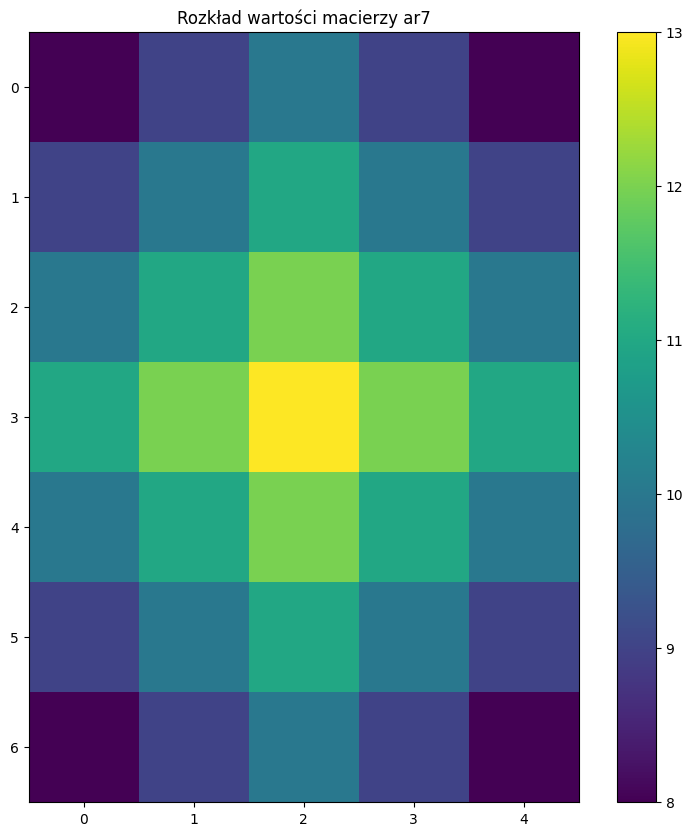

In [47]:
fig, ax = plt.subplots( figsize = (10,10) )
im = ax.imshow(ar7, cmap="viridis")

fig.colorbar(ax = ax, mappable=im)
ax.set_title("Rozkład wartości macierzy ar7")

plt.show()

## Zadanie 4

a) Zdefiniuj zmienną `ar8` jako macierz przygotowaną zgodnie z poniższymi wytycznymi:

1) Korzystając z funkcji `np.zeros()` zdefiniuj macierz zerową o wymiarach 10x10.
2) Dodaj 1 do elementów znajdujących się w trzeciej kolumnnie macierzy.
3) Dodaj 1 do elementów znajdujących się w trzeciem od końca wierszu macierzy.
4) Dodaj 3 do elementów, które jednocześnie znajdują się w 2-6 wierszu i 5-9 kolumnie macierzy.

In [55]:
ar8 = np.zeros((10,10))
ar8[:, 2] += 1
ar8[ -3, : ] += 1
ar8[1:6, 4:9 ] += 3

In [56]:
# Komórka testowa
assert ar8.shape == (10, 10)
assert np.isclose(ar8.min(), 0)
assert np.isclose(ar8.max(), 3)
assert np.all(np.isclose(ar8.sum(axis=0), [1.,  1., 11.,  1., 16., 16., 16., 16., 16.,  1.]))
assert np.all(np.isclose(ar8.sum(axis=1), [1., 16., 16., 16., 16., 16.,  1., 11.,  1.,  1.]))

b) Korzystając z funkcji `plt.subplots()` przygotuj figurę o wymiarach 12x10 zawierając jedno pole na wykres. W polu tym, korzystając z funkcji `sns.heatmap()` umieść wykres przedstawiający rozkład wartości macierzy `ar8`. Ustaw wartość parametru `cmap` na "viridis". Nadaj wykresowi tytuł "Rozkład wartości w macierzy ar8".

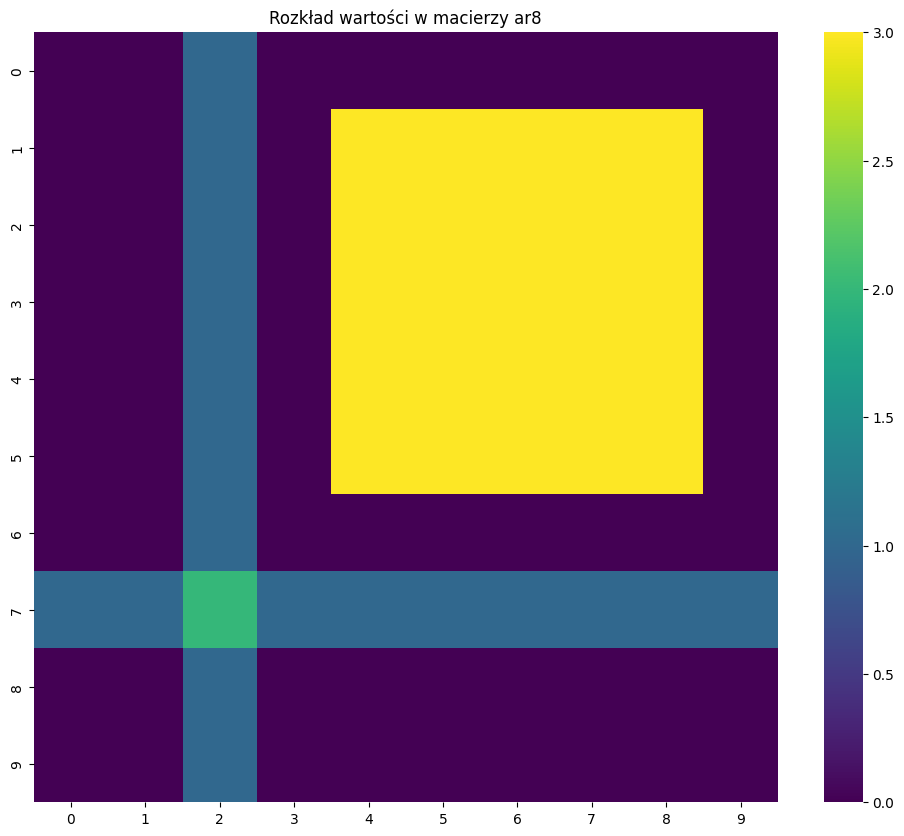

In [60]:
fig, ax = plt.subplots( figsize = (12,10) )
sns.heatmap(ax = ax, data=ar8, cmap="viridis")
ax.set_title("Rozkład wartości w macierzy ar8")

plt.show()

# Zadanie 5

a) Korzystając z funkcji `np.full()` zdefiniuj zmienne `ar9` i `ar10` jako macierze o wymiarach 5x3 zawierające wartości odpowiednio 6 i 11.

In [62]:
ar9 = np.full( (5,3), 6)
ar10 = np.full( (5,3), 11 )

In [63]:
# Komórka testowa
assert ar9.shape == (5, 3)
assert np.isclose(ar9.min(), 6)
assert np.isclose(ar9.max(), 6)

assert ar9.shape == (5, 3)
assert np.isclose(ar9.min(), 6)
assert np.isclose(ar9.max(), 6)

b) Korzystając z funckji `np.hstack()` zdefiniuj zmienną `ar11` zawierającą w sobie połączone macierze `ar9` i `ar10`. Następnie wyświetl otrzymaną macierz.

In [65]:
ar11 = np.hstack((ar9, ar10))

In [66]:
# Komórka testowa
assert ar11.shape == (5, 6)
assert np.isclose(ar11.min(), 6)
assert np.isclose(ar11.max(), 11)
assert np.all(np.isclose(ar11.sum(axis=0), [30, 30, 30, 55, 55, 55]))
assert np.all(np.isclose(ar11.sum(axis=1), [51, 51, 51, 51, 51]))

c) Korzystając z funckji `np.vstack()` zdefiniuj zmienną `ar12` zawierającą w sobie połączone macierze `ar9` i `ar10`. Następnie wyświetl otrzymaną macierz.

In [67]:
ar12 = np.vstack((ar9, ar10))

In [68]:
# Komórka testowa
assert ar12.shape == (10, 3)
assert np.isclose(ar12.min(), 6)
assert np.isclose(ar12.max(), 11)
assert np.all(np.isclose(ar12.sum(axis=0), [85, 85, 85]))
assert np.all(np.isclose(ar12.sum(axis=1), [18, 18, 18, 18, 18, 33, 33, 33, 33, 33]))

## Zadanie 6

a) Korzystając z funkcji `np.linspace()` zdefiniuj zmienną `x` jako macierz zawierającą 100 liczb z przedziału $[0, 2\pi]$.

In [70]:
x = np.linspace(0, 2*np.pi, 100)

In [71]:
# Komórka testowa
assert x.shape == (100,)
assert np.isclose(x.min(), 0)
assert np.isclose(x.max(), 6.283185307179586)
assert np.isclose(x.sum(), 314.15926535897927)

b) Korzystając z funkcji `np.sin()` zdefiniuj macierz `y` zawierającą wartości funkcji $y = x^2 sin(x)$ obliczone na podstawie wartości zmiennej `x`.

In [72]:
y = x**2 * np.sin(x)

In [73]:
# Komórka testowa
assert y.shape == (100,)
assert np.isclose(y.min(), -24.08157817807183)
assert np.isclose(y.max(), 3.945229395130286)
assert np.isclose(y.sum(), -621.8265349162731)

c) Korzystając z funkcji `pd.DataFrame()` zdefiniuj zmienną `df1`. Następnie dodaj do zdefiniowanej tablicy wartości macierzy `x` i `y` ustawiając odpowiednio "X" i "Y" jako nazwy kolumn.

In [156]:
df1 = pd.DataFrame(
    {
        "X":x,
        "Y":y
    }
)

In [157]:
# Komórka testowa
assert df1.shape == (100, 2)
assert np.all(df1.columns == ['X', 'Y'])
assert np.isclose(df1["X"].min(), 0)
assert np.isclose(df1["X"].max(), 6.283185307179586)
assert np.isclose(df1["X"].sum(), 314.15926535897927)
assert np.isclose(df1["Y"].min(), -24.08157817807183)
assert np.isclose(df1["Y"].max(), 3.945229395130286)
assert np.isclose(df1["Y"].sum(), -621.8265349162731)

d) Wykorzystaj funkcje `pd.DataFrame.head()`, `pd.DataFrame.tail()` i `pd.DataFrame.describe()` do wyświetlenia początku i końca tablicy oraz statystycznego podsumowania zawartych w niej danych.

In [77]:
df1.head()

,X,Y
0,0.000000,0.000000
1,0.063467,0.000255
2,0.126933,0.002040
3,0.190400,0.006861
4,0.253866,0.016186


In [78]:
df1.tail()

,X,Y
95,6.029319,-9.129905e+00
96,6.092786,-7.025392e+00
97,6.156252,-4.797783e+00
98,6.219719,-2.453548e+00
99,6.283185,-9.669424e-15


In [80]:
df1.describe()

,X,Y
count,100.000000,1.000000e+02
mean,3.141593,-6.218265e+00
std,1.841258,9.889789e+00
min,0.000000,-2.408158e+01
25%,1.570796,-1.544671e+01
50%,3.141593,-4.834712e-15
75%,4.712389,1.764147e+00
max,6.283185,3.945229e+00


e) Korzystając z funkcji `plt.subplots()` przygotuj figurę o wymiarach 15x10 zawierając dwa pola na wykresy (siatka 2x1). Na górnym polu umieść wykres liniowy wygenerowany za pomocą funkcji `plt.plot()`. Na dolnym polu umieść wykres wygenerowany za pomocą funkcji `sns.lineplot()`. Przygotowując wykresy wykorzystaj dane z tablicy `df1`. W obu przypadkach zadbaj o to aby wykresy miały nadany tytuł, podpisane osie, a zakres osi x dostosowany był do zakresu danych. Samodzielnie dobierz inne od domyślnych wartości parametrów określających styl, grubość i kolor linii oraz dostosuj odległość między wykresami z wykorzystaniem funkcji `plt.subplots_adjust()`.

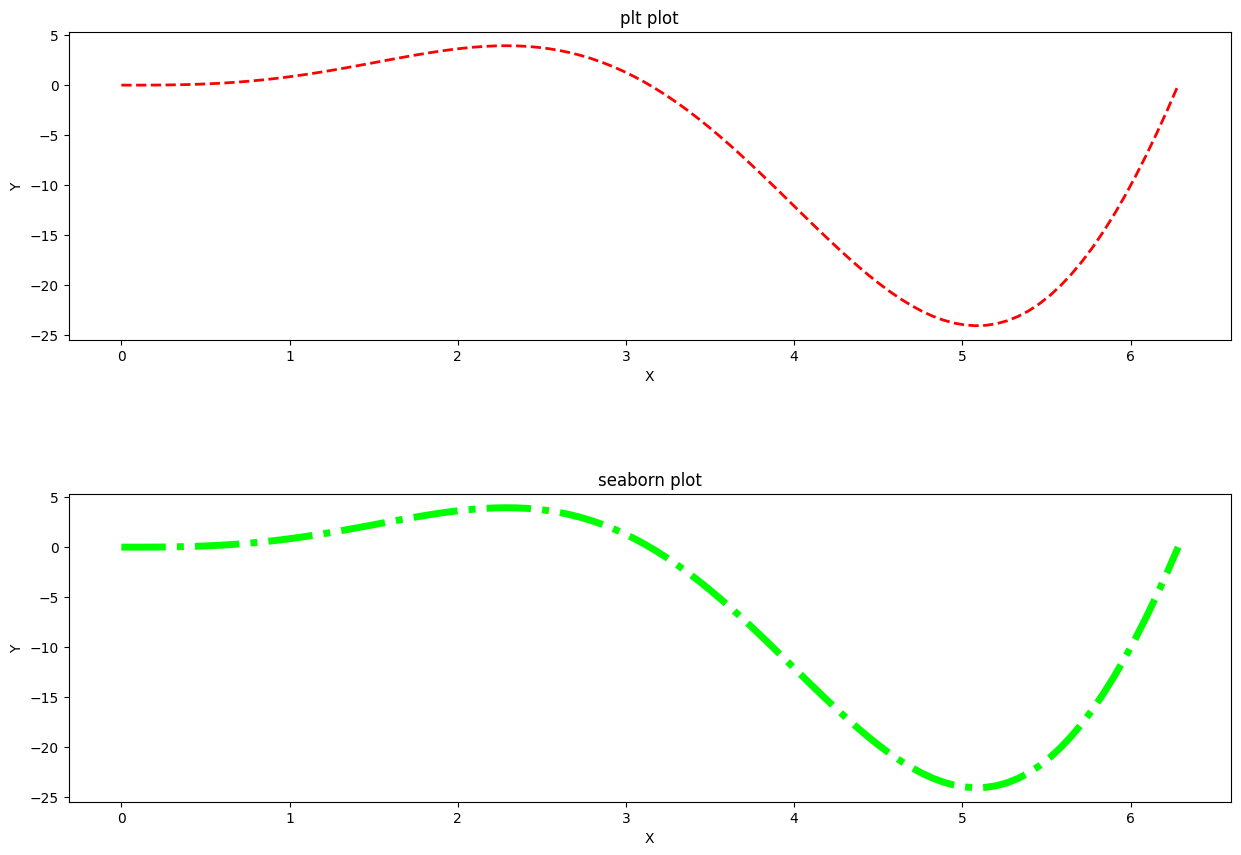

In [164]:
fig, ax = plt.subplots( figsize = (15,10), nrows = 2, ncols = 1 )
ax[0].plot(df1["X"], df1["Y"], color="#FF0000", linewidth = 2, linestyle="--")
ax[0].set_title("plt plot")
ax[0].set_xlabel("X")
ax[0].set_ylabel("Y")
ax[0].set_xlim(auto=True)

sns.lineplot(x = "X", y = "Y", data=df1, ax = ax[1], color = "#00FF00", linewidth = 5, linestyle="-.")
ax[1].set_title("seaborn plot")
ax[1].set_xlabel("X")
ax[1].set_ylabel("Y")
ax[1].set_xlim(auto=True)

plt.subplots_adjust( hspace = 0.5 )
plt.show()

## Zadanie 7

Zmienna `df2` zawiera dane z badań kwiatów.

In [97]:
df2 = sns.load_dataset("iris")
df2.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


a) Korzystając z funkcji `plt.subplots()` i `sns.scatterplot()` przygotuj figurę o wymiarach 15x7.5 zawierając dwa pola na wykresy (siatka 1x2). Zapełnij pola wykresami zestawiającymi ze sobą długość i szerokość poszczególnych fragmentów kwiatów, jednocześnie rozróżniając punkty na wykresach kolorem (`hue`) na podstawie gatunku roślin.

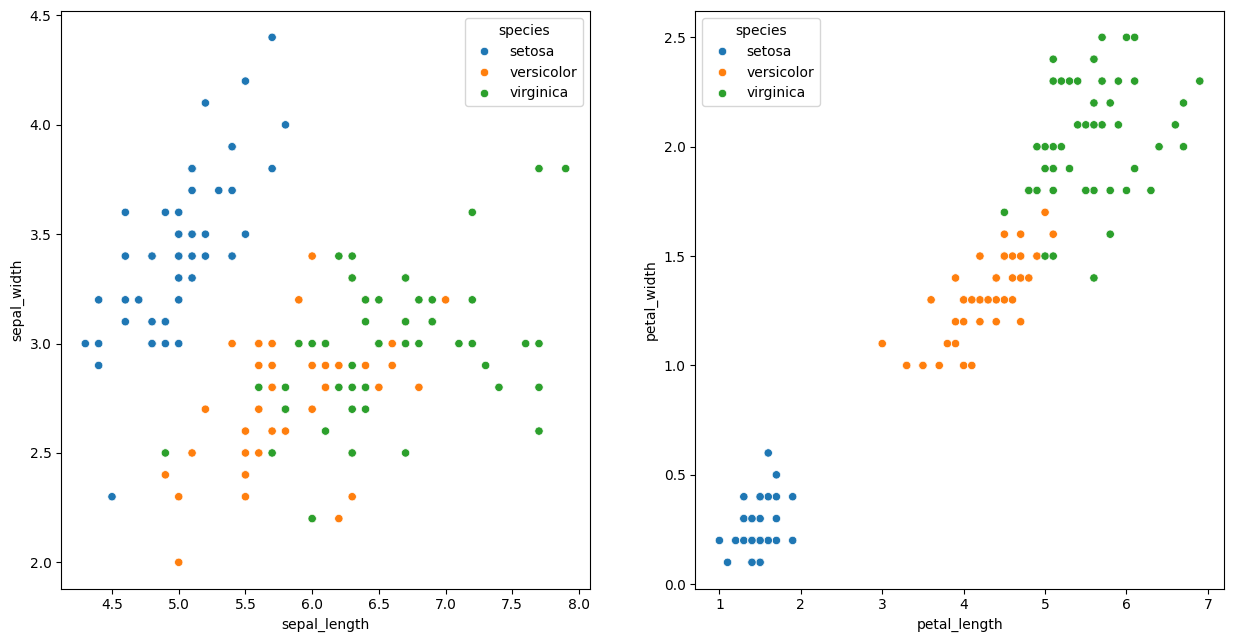

In [100]:
fig, ax = plt.subplots( figsize = (15,7.5), nrows = 1, ncols = 2 )

sns.scatterplot( x = "sepal_length", y = "sepal_width", data = df2, ax = ax[0], hue = "species")

sns.scatterplot( x = "petal_length", y = "petal_width", data = df2, ax = ax[1], hue = "species" )

plt.show()

b) Korzystając z funkcji `plt.subplots()` i `sns.histplot()` przygotuj figurę o wymiarach 20x5 zawierając cztery pola na wykresy (siatka 1x4). Zapełnij pola histogramami wybranych przez siebie parametrów liczbowych, jednocześnie rozróżniając na wykresach kolorem (`hue`) dane przypisane do poszczególnych gatunków roślin. Przetestuj wykorzystanie różnych wartości parametrów `element`, `kde` i `multiple` oraz innych wybranych przez siebie parametrów wykresu.

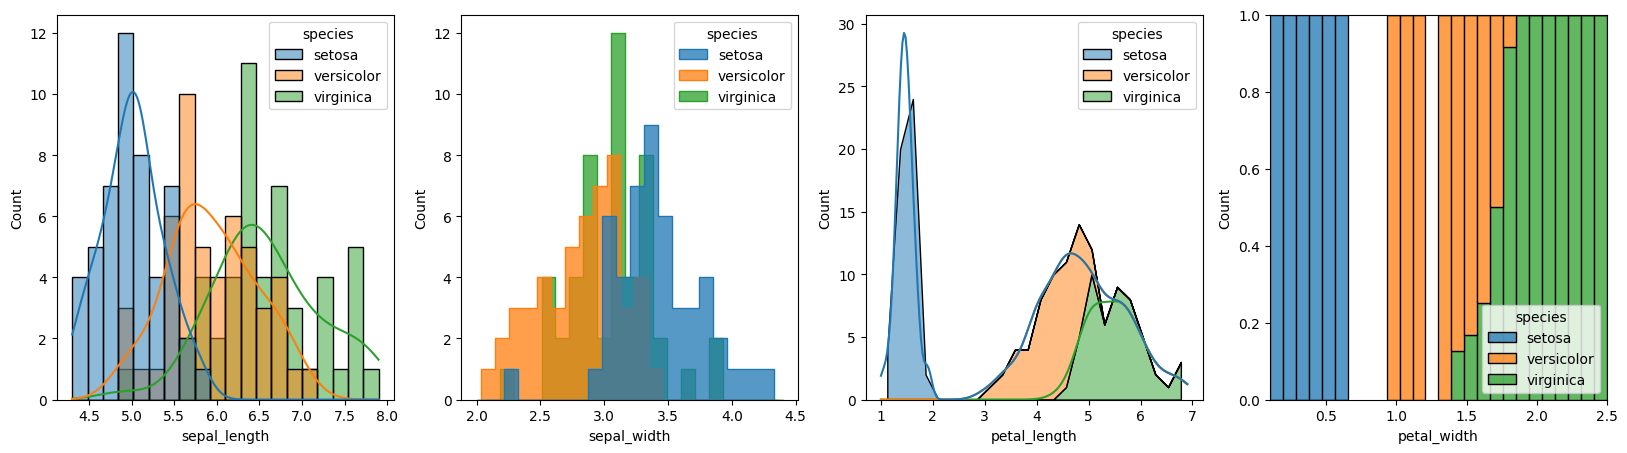

In [116]:
fig, ax = plt.subplots( figsize = (20,5), nrows = 1, ncols = 4 )

flower_data = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
elements = ["bars", "step", "poly"]
kde = [True, False]
multiple = ["layer", "dodge", "stack", "fill"]

for i in range(len(flower_data)):
    sns.histplot(
        data = df2,
        x = flower_data[i],
        hue = "species",
        element = elements[i%len(elements)],
        kde = kde[i%len(kde)],
        multiple = multiple[i%len(multiple)],
        ax = ax[i],
        cbar = False,
        bins = (i+10)*2
    )


c) Zdefiniuj i wyświetl zmienną `df_setosa`, która zawiera wyłącznie dane odnoszące się do kwiatów z gatunku setosa.

In [117]:
df_setosa = df2[df2["species"] == "setosa"]

In [118]:
# Komórka testowa
assert df_setosa.shape == (50, 5)
assert df_setosa["species"].unique() == ['setosa']

## Zadanie 8

Zmienna `df3` zawiera dane z badań pingwinów.

In [119]:
df3 = sns.load_dataset("penguins")
df3.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


a) Wykorzystaj funckję `pd.DataFrame.dropna()` do usunięcia z tablicy `df3` wierszy zawierających wartości `NaN`.

In [123]:
df3.dropna(inplace=True)

In [124]:
# Komórka testowa
assert df3.shape == (333, 7)

b) Korzystając z funkcji `plt.subplots()` oraz `sns.scatterplot()` przygotuj figurę o wymiarach 15x15 zawierając 4 pola na wykresy (siatka 2x2). Zapełnij wszystkie pola wykresami zestawiającymi ze sobą różne parametry liczbowe, jednocześnie rozróżniając punkty na wykresach kolorem (`hue`) i kształtem (`style`) na podstawie wybranych przez siebie parametrów opisowych.

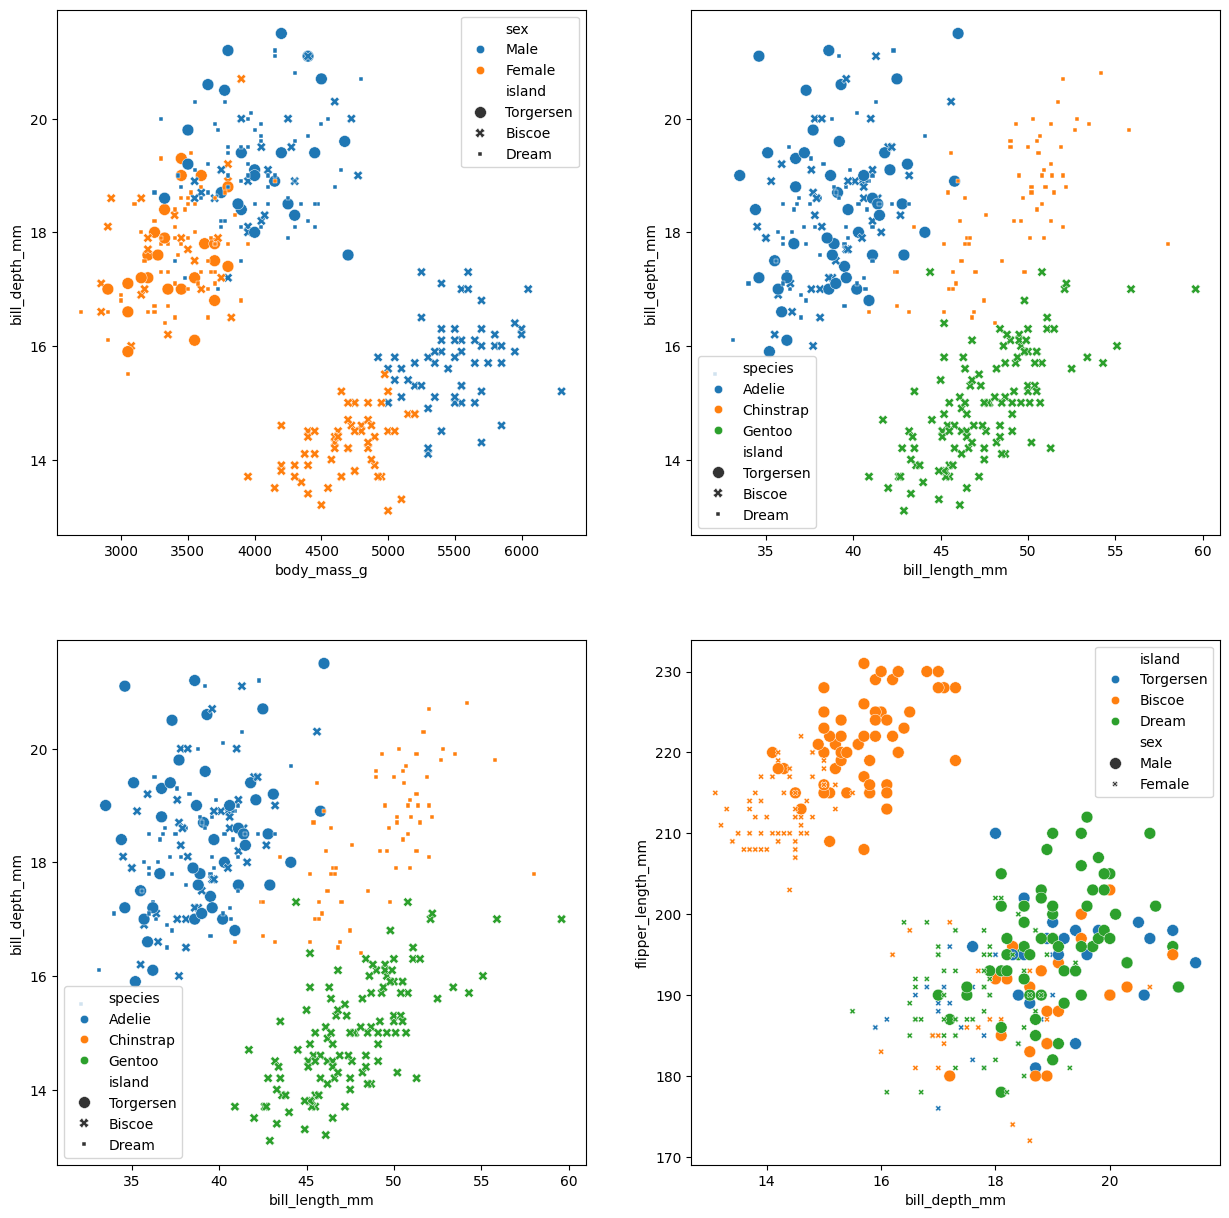

In [140]:
fig, ax = plt.subplots( figsize = (15,15), nrows = 2, ncols = 2 )

params = ["species", "island", "sex"]
values = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]

for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):
        sns.scatterplot(data = df3,
                        x = values[(i + j - 1) % len(values)],
                        y = values[(i * j + 1) % len(values)],
                       hue = params[(i+j - 1) % len(params)],
                       style = params[(i*j + 1) % len(params)],
                       ax = ax[i][j],
                        legend = "brief",
                        size = params[(i*j + 1) % len(params)]
                       )
plt.show()

c) Zdefiniuj i wyświetl zmienną `df_AT`, która zawiera wyłącznie dane odnoszące się do pingwinów z gatunku Adelie przebadanych na wyspie Torgersen.

In [143]:
df_AT = df3[ ( df3["species"] == "Adelie" ) & ( df3["island"] == "Torgersen" )]

In [144]:
# Komórka testowa
assert df_AT.shape == (47, 7)
assert df_AT["species"].unique() == ['Adelie']
assert df_AT["island"].unique() == ['Torgersen']

d) Odpowiedz na pytanie jaka jest średnia długość dzioba pingwinów płci żeńskiej zbadanych na wyspie Biscoe. Odpowiedź zapisz w zmiennej `bill_length`.

In [147]:
bill_length = df3[ (df3["sex"] == "Female") & (df3["island"] == "Biscoe")]["bill_length_mm"].mean()

In [148]:
# Komórka testowa
assert np.isclose(bill_length, 43.30749999999999)

e) Odpowiedz na pytanie jakie są minimalne, średnie i maksymalne wagi pingwinów gatunku Adelie zbadanych na poszczególnych wyspach. Wyniki zapisz w tablicy pandas o następującej strukturze:
- nazwy kolumn: nazwy wysp w kolejności alfabetycznej
- nazwy wierszy: kolejno "min", "mean", "max"

In [158]:
df_w = df3[df3["species"] == "Adelie"].groupby("island")["body_mass_g"].agg(["min", "mean", "max"]).T
df_w

island,Biscoe,Dream,Torgersen
min,2850.000000,2900.000000,2900.000000
mean,3709.659091,3701.363636,3708.510638
max,4775.000000,4650.000000,4700.000000


In [154]:
# Komórka testowa
assert df_w.shape == (3, 3)
assert np.all(df_w.columns == ['Biscoe', 'Dream', 'Torgersen'])
assert np.all(df_w.index == ['min', 'mean', 'max'])
assert np.all(np.isclose(df_w.values, np.array([[2850., 2900., 2900.], [3709.65909091, 3701.36363636, 3708.5106383], [4775., 4650., 4700.]])))